# Exploratory Data Analysis (EDA) for Financial News Dataset
This notebook performs EDA on the Financial News and Stock Price Integration Dataset (FNSPID) as part of the 10 Academy AIM Week 1 Challenge. The analysis includes descriptive statistics, text analysis, time series analysis, and publisher analysis to uncover insights about financial news and their potential impact on stock prices.

In [4]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset
Load the FNSPID dataset from the `data/` folder and inspect its structure.

In [5]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1407328 non-null  int64                    
 1   headline    1407328 non-null  object                   
 2   url         1407328 non-null  object                   
 3   publisher   1407328 non-null  object                   
 4   date        1407328 non-null  datetime64[ns, UTC-04:00]
 5   stock       1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 64.4+ MB
None

First 5 Rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3

## Descriptive Statistics
Analyze headline lengths, count articles per publisher, and examine publication date trends.

In [6]:
# Calculate headline length
df['headline_length'] = df['headline'].apply(len)
print("Headline Length Statistics:")
print(df['headline_length'].describe())

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [7]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nArticles per Publisher:")
print(publisher_counts)


Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


In [8]:
# Extract date (without time) for trend analysis
df['date_only'] = df['date'].dt.date
date_counts = df['date_only'].value_counts().sort_index()
print("\nPublication Date Counts:")
print(date_counts)


Publication Date Counts:
date_only
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64


## Text Analysis (Topic Modeling)
Use NLTK to extract common keywords from headlines, excluding stopwords, to identify frequent topics or events.

In [9]:
# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

# Extract keywords
stop_words = set(stopwords.words('english'))
words = []
for headline in df['headline']:
    tokens = word_tokenize(headline.lower())
    words.extend([word for word in tokens if word.isalpha() and word not in stop_words])
word_freq = Counter(words)
print("\nTop 10 Keywords:")
print(word_freq.most_common(10))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zyona\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zyona\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zyona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 10 Keywords:
[('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688), ('update', 91645), ('market', 91080), ('earnings', 87183), ('sales', 79528)]


## Time Series Analysis
Analyze the frequency of article publications over time to identify trends or spikes related to market events.

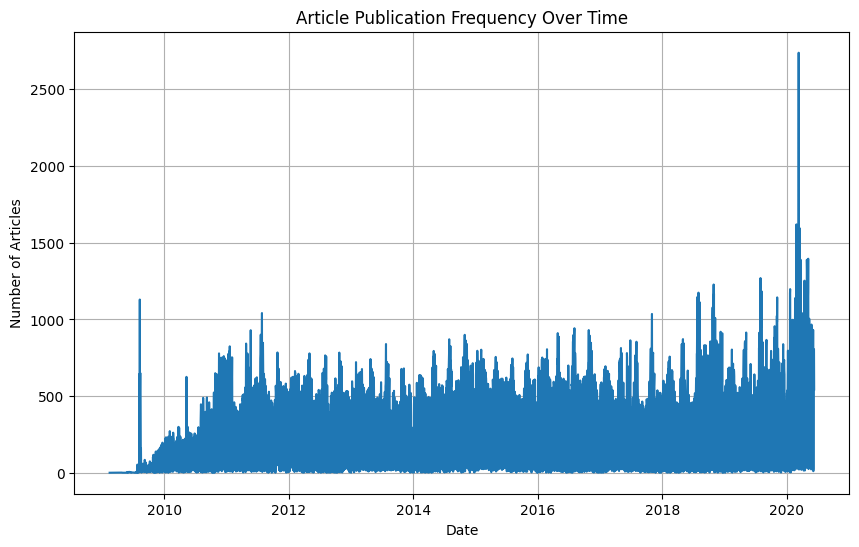

In [14]:
# Plot publication frequency
plt.figure(figsize=(10, 6))
date_counts.plot(kind='line')
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.savefig('../plots/publication_frequency.png')
plt.show()

## Publisher Analysis
Identify the most active publishers and extract domains from publisher names (if email addresses) to analyze organizational contributions.

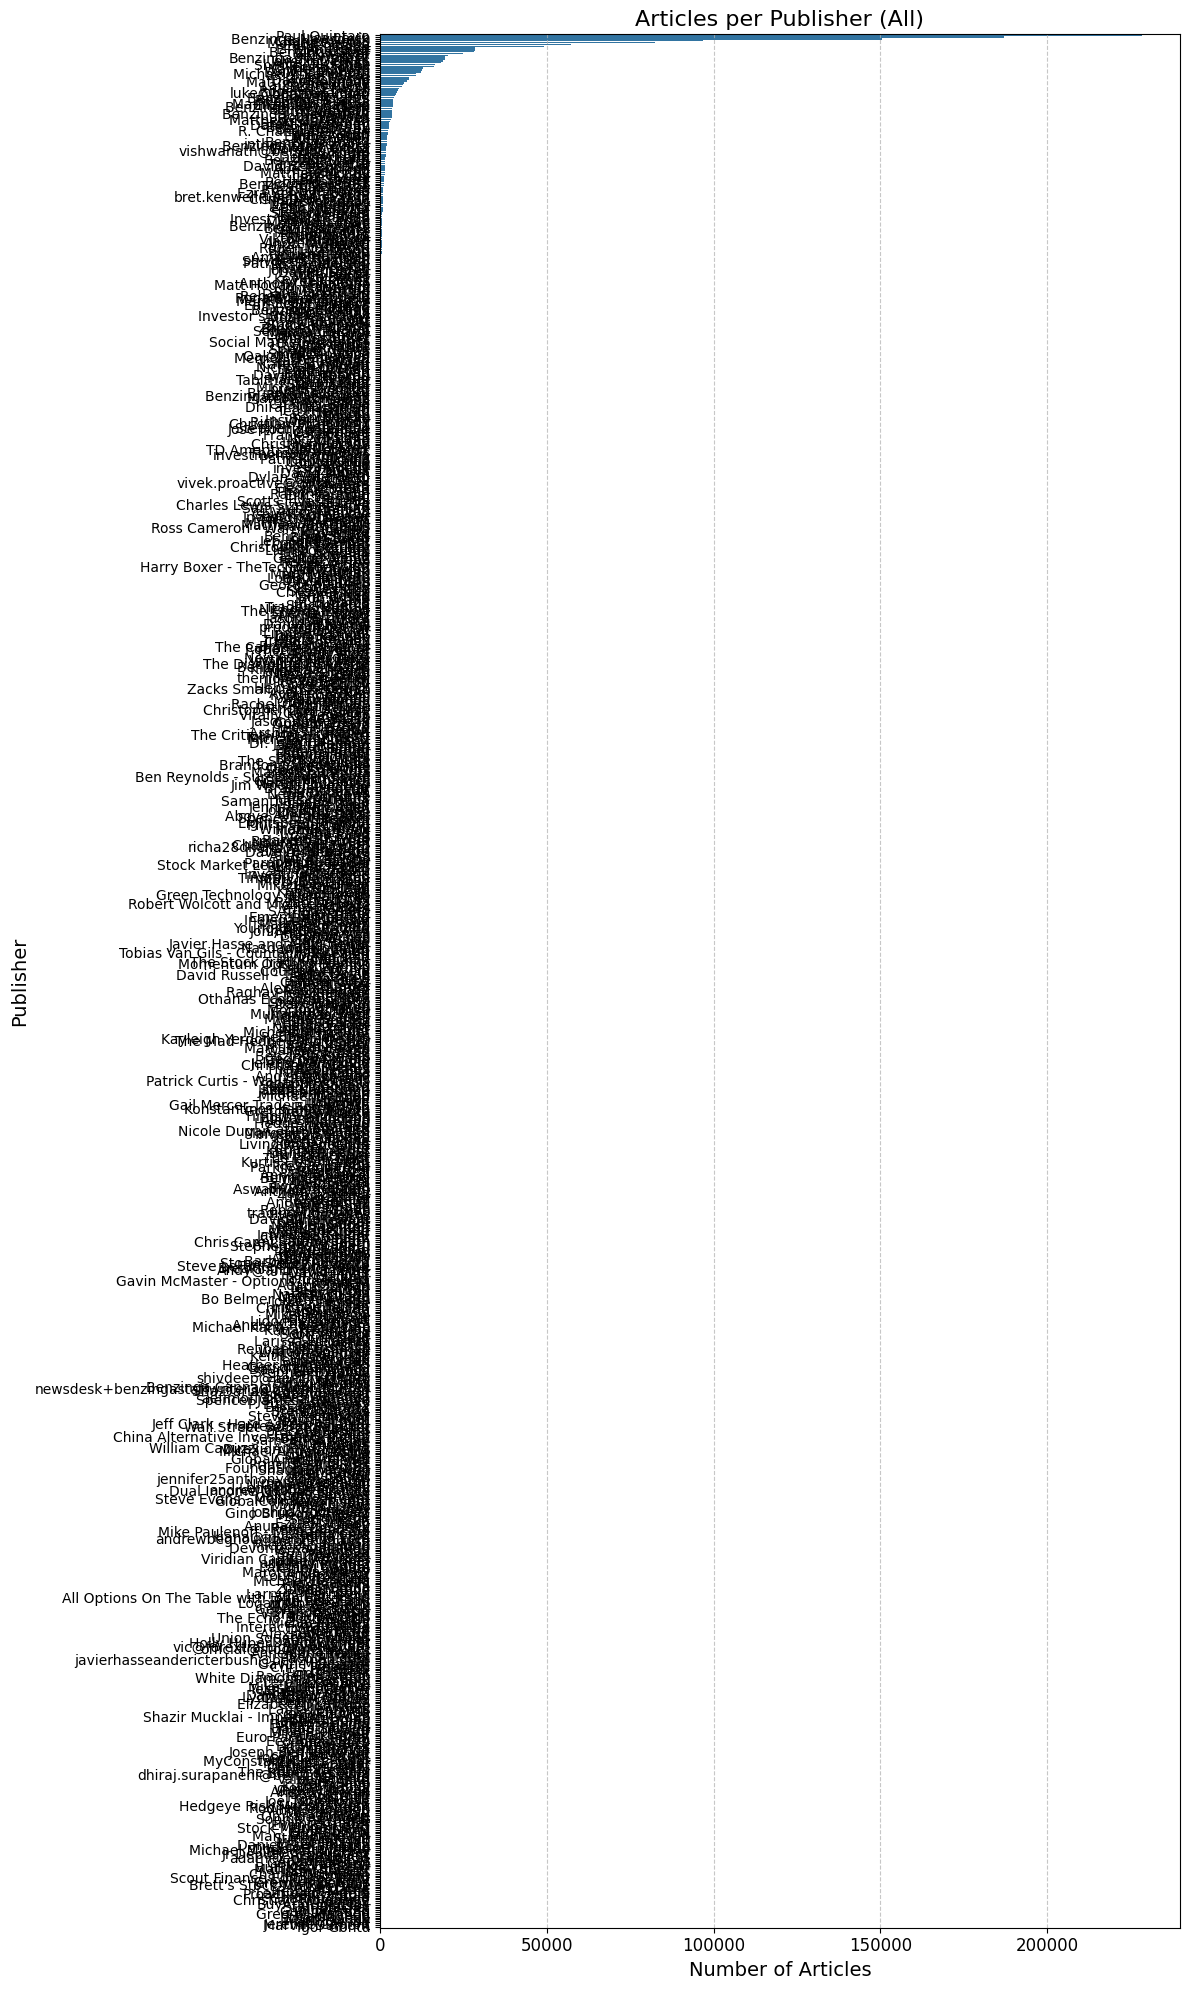

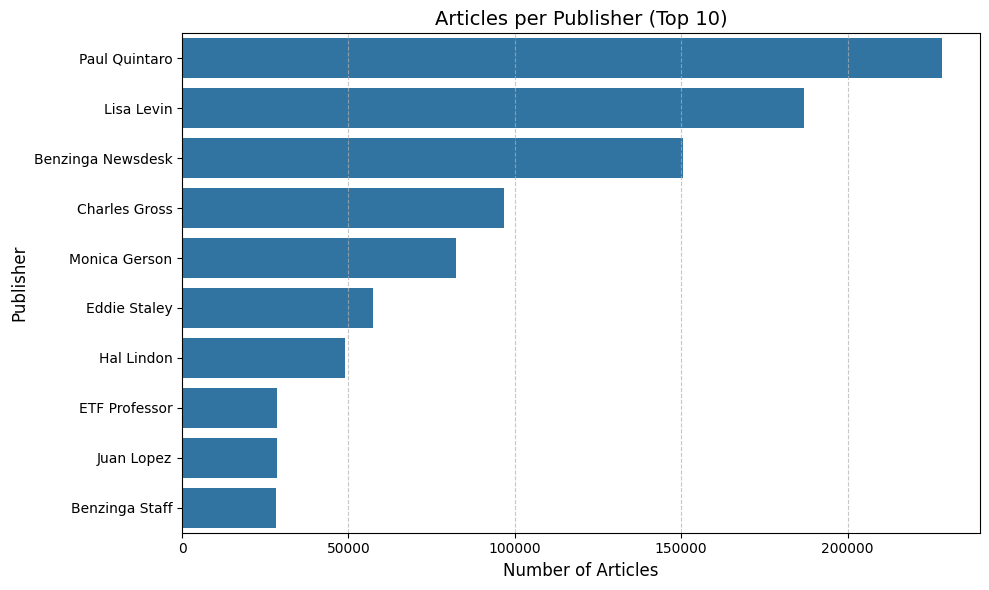


Publisher Domains:
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


In [19]:
# Plot 1: All publishers
plt.figure(figsize=(12, 20))  # Large height to accommodate all publishers
sns.barplot(x=publisher_counts.values, y=publisher_counts.index)
plt.title('Articles per Publisher (All)', fontsize=16)
plt.xlabel('Number of Articles', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10, rotation=0)  # Keep labels horizontal
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add gridlines for x-axis
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('../plots/publisher_counts_all.png')
plt.show()

# Plot 2: Top 10 publishers
top_publishers = publisher_counts.head(10)
plt.figure(figsize=(10, 6))  # Smaller size for focused plot
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Articles per Publisher (Top 10)', fontsize=14)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Keep labels horizontal
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add gridlines for x-axis
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('../plots/publisher_counts_top10.png')
plt.show()

# Extract domains from publisher emails (if applicable)
df['publisher_domain'] = df['publisher'].str.extract(r'@([\w.]+)')
domain_counts = df['publisher_domain'].value_counts()
print("\nPublisher Domains:")
print(domain_counts)